# Project description

This report on Yandex.Afisha users comes to investigate: 

1.How users use the product

2.When they start to buy

3.How much money each customer brings

4.When they pay off 

In order to advise the marketing experts how much money to invest and in which marketing sources to invest.


# Description of the data

The visits table (server logs with data on website visits):

•	Uid — user's unique identifier

•	Device — user's device

•	Start Ts — session start date and time

•	End Ts — session end date and time

•	Source Id — identifier of the ad source the user came from


All dates in this table are in YYYY-MM-DD format.

The orders table (data on orders):

•	Uid — unique identifier of the user making an order

•	Buy Ts — order date and time

•	Revenue — Yandex.Afisha's revenue from the order


The costs table (data on marketing expenses):

•	source_id — ad source identifier

•	dt — date

•	costs — expenses on this ad source on this day

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import datetime as dt
import sidetable
import plotly.express as px

In [2]:
try:
    visits = pd.read_csv('C:/Users/ASUS/OneDrive/Desktop/projcts files/visits_log_us.csv',dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts'])
    orders = pd.read_csv('C:/Users/ASUS/OneDrive/Desktop/projcts files/orders_log_us.csv',parse_dates=['Buy Ts'])
    costs = pd.read_csv('C:/Users/ASUS/OneDrive/Desktop/projcts files/costs_us.csv',parse_dates=['dt'])
    
    
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv',dtype={'Device': 'category'},
    parse_dates=['Start Ts', 'End Ts']) 
    orders = pd.read_csv('/datasets/orders_log_us.csv',parse_dates=['Buy Ts'])
    costs = pd.read_csv('/datasets/costs_us.csv',parse_dates=['dt'])
   
    

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [5]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [6]:
visits.stb.missing(style=True)
orders.stb.missing(style=True)
costs.stb.missing(style=True)

,missing,total,percent
Device,0,"359,400",0.00%
End Ts,0,"359,400",0.00%
Source Id,0,"359,400",0.00%
Start Ts,0,"359,400",0.00%
Uid,0,"359,400",0.00%


,missing,total,percent
Buy Ts,0,"50,415",0.00%
Revenue,0,"50,415",0.00%
Uid,0,"50,415",0.00%


,missing,total,percent
source_id,0,"2,542",0.00%
dt,0,"2,542",0.00%
costs,0,"2,542",0.00%


# Product 

### How many people use it every day, week, and month

In [7]:
visits['session_year']  = visits['Start Ts'].dt.year
visits['session_month'] = visits['Start Ts'].dt.month
visits['session_week']  =visits['Start Ts'].dt.isocalendar().week
visits['session_date'] = visits['Start Ts'].dt.date
visits_desktop=visits.query('Device=="desktop"')
visits_touch=visits.query('Device=="touch"')
#calculation for desktop
desktop_mau = (
    visits_desktop.groupby(['session_year', 'session_month'])
    .agg({'Uid': 'nunique'})
    .mean()
)
desktop_dau = (visits_desktop.groupby('session_date').agg({'Uid': 'nunique'}).mean())
desktop_wau = (visits_desktop.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).mean())
print('desktop device')
print('-------------')
print('the number of daily active users  is: ',int(desktop_dau))
print('the number of weekly active users is: ',int(desktop_wau))
print('the number of monthly active users is: ',int(desktop_mau))
#calculation for touch
touch_mau = (
    visits_touch.groupby(['session_year', 'session_month'])
    .agg({'Uid': 'nunique'})
    .mean()
)
touch_dau = (visits_touch.groupby('session_date').agg({'Uid': 'nunique'}).mean())
touch_wau = (visits_touch.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).mean())
print('touch device')
print('-------------')
print('the number of daily active users  is: ',int(touch_dau))
print('the number of weekly active users is: ',int(touch_wau))
print('the number of monthly active users is: ',int(touch_mau))

desktop device
-------------
the number of daily active users  is:  659
the number of weekly active users is:  4129
the number of monthly active users is:  16724
touch device
-------------
the number of daily active users  is:  252
the number of weekly active users is:  1634
the number of monthly active users is:  6825


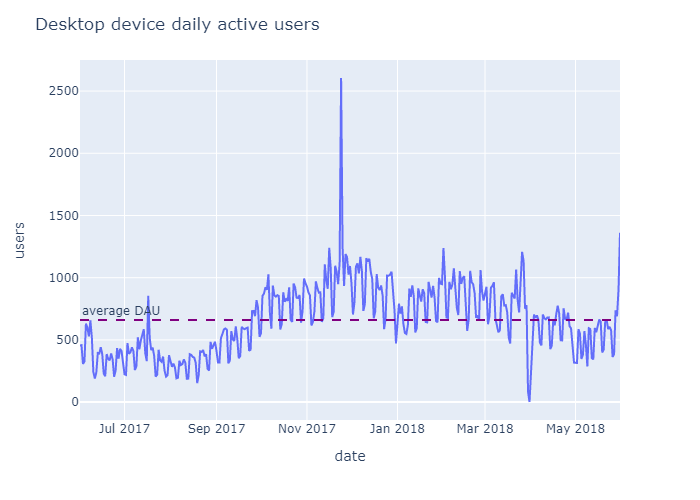

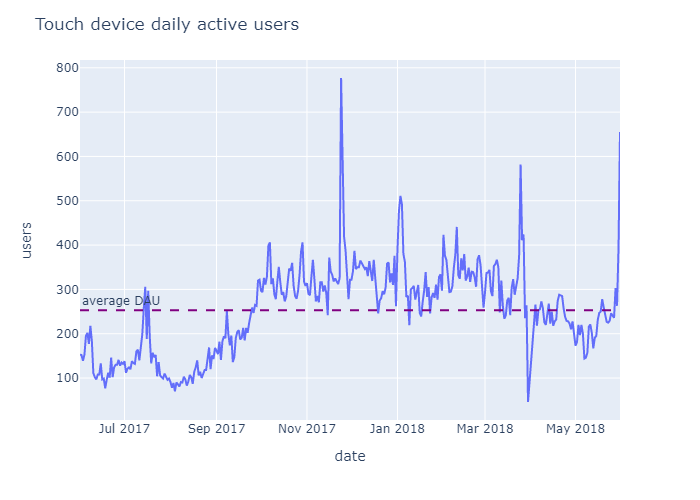

In [8]:
desktop_dau_graph =visits_desktop.groupby('session_date').agg({'Uid': 'nunique'}).reset_index()
fig = px.line(desktop_dau_graph, x="session_date", y="Uid")
fig.update_layout(title='Desktop device daily active users',
                   xaxis_title='date',
                   yaxis_title='users')
fig.add_hline(y=desktop_dau['Uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average DAU",
             annotation_position="top left")
fig.show("png");
touch_dau_graph =visits_touch.groupby('session_date').agg({'Uid': 'nunique'}).reset_index()
fig = px.line(touch_dau_graph, x="session_date", y="Uid")
fig.update_layout(title='Touch device daily active users',
                   xaxis_title='date',
                   yaxis_title='users')
fig.add_hline(y=touch_dau['Uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average DAU",
             annotation_position="top left")
fig.show("png");

#### DAU conclusion 

From the dau of the desktop device we can see that the activity is quite steady around the average with few peaks. the largest one is on the 24/11/2017. this day is black friday, what probbaly explain the peak of activity on that day. from the dau of the touch device we can see  that the activity is abit more jumpy but still mostly close to average. the peak on the black friday appear also here. 

Between the two devices we can see that on the desktop device there much more activity.

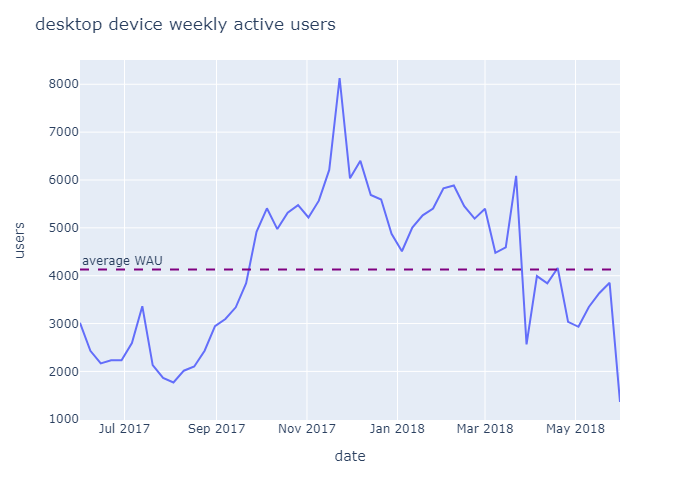

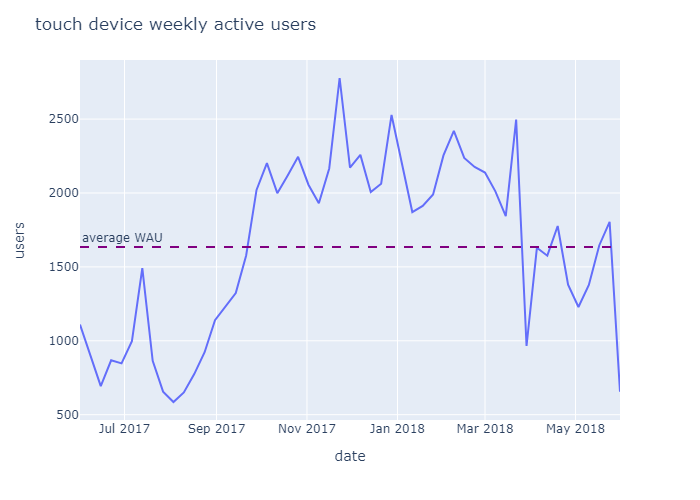

In [9]:
visits_desktop['week']  = visits_desktop['Start Ts'].astype('datetime64[W]')
desktop_wau_graph =(visits_desktop.groupby(['week']).agg({'Uid': 'nunique'})).reset_index()
fig = px.line(desktop_wau_graph, x="week", y="Uid")
fig.update_layout(title='desktop device weekly active users',
                   xaxis_title='date',
                   yaxis_title='users')
fig.add_hline(y=desktop_wau['Uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average WAU",
             annotation_position="top left")
fig.show("png");
visits_touch['week']  = visits_touch['Start Ts'].astype('datetime64[W]')
touch_wau_graph =(visits_touch.groupby(['week']).agg({'Uid': 'nunique'})).reset_index()
fig = px.line(touch_wau_graph, x="week", y="Uid")
fig.update_layout(title='touch device weekly active users',
                   xaxis_title='date',
                   yaxis_title='users')
fig.add_hline(y=touch_wau['Uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average WAU",
             annotation_position="top left")
fig.show("png");

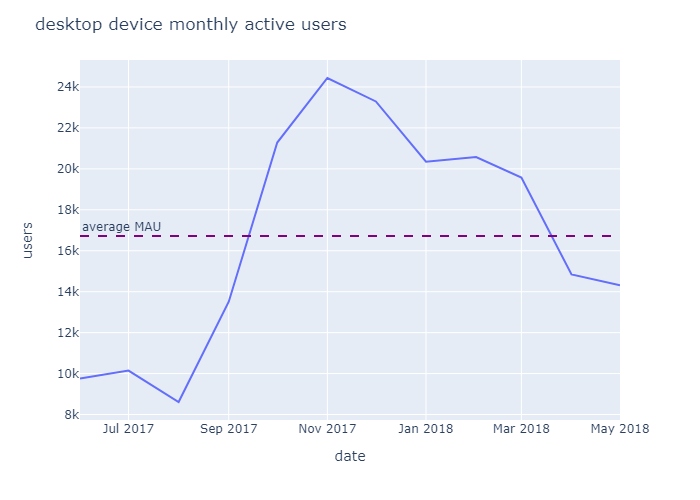

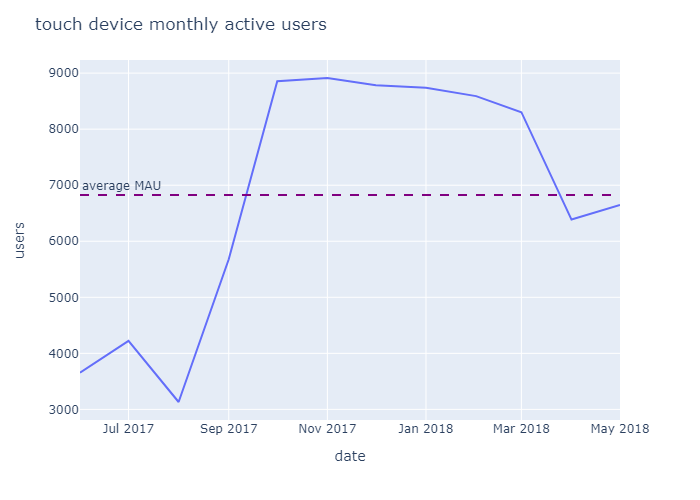

In [10]:
visits_desktop['month'] = visits_desktop['Start Ts'].astype('datetime64[M]')
desktop_mau_graph =(visits_desktop.groupby(['month']).agg({'Uid': 'nunique'})).reset_index()
fig = px.line(desktop_mau_graph, x="month", y="Uid")
fig.update_layout(title='desktop device monthly active users',
                   xaxis_title='date',
                   yaxis_title='users')
fig.add_hline(y=desktop_mau['Uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average MAU",
             annotation_position="top left")
fig.show("png");
visits_touch['month'] = visits_touch['Start Ts'].astype('datetime64[M]')
touch_mau_graph =(visits_touch.groupby(['month']).agg({'Uid': 'nunique'})).reset_index()
fig = px.line(touch_mau_graph, x="month", y="Uid")
fig.update_layout(title='touch device monthly active users',
                   xaxis_title='date',
                   yaxis_title='users')
fig.add_hline(y=touch_mau['Uid'].mean(),line_dash="dash", line_color="purple", annotation_text="average MAU",
             annotation_position="top left")
fig.show("png");

#### WAU and MAU conclusion 

From the wau and the dau of both devices  we can see that  few peaks. the largest one is on the 11/2017. probbaly because of black friday. we can see that that from october to march in both devices the visits are above the average, this is the high season.

Between the two devices we can see that on the desktop device there much more activity. 

### How many sessions are there per day 

In [11]:
visits_desktop['session_day'] = visits_desktop['Start Ts'].astype('datetime64[D]')
visits_touch['session_day'] = visits_touch['Start Ts'].astype('datetime64[D]')


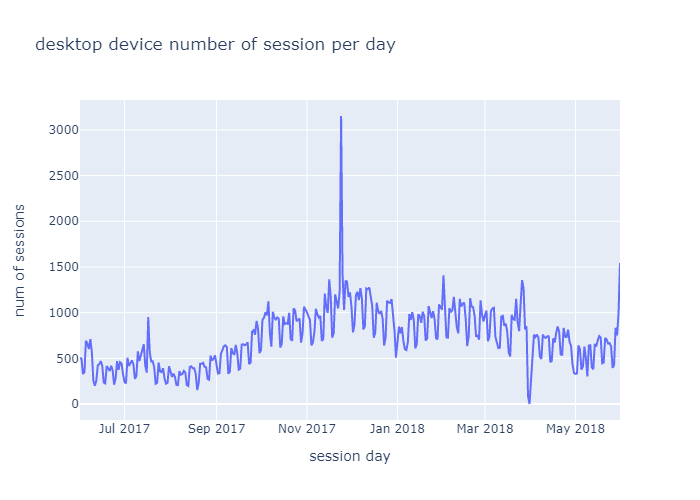

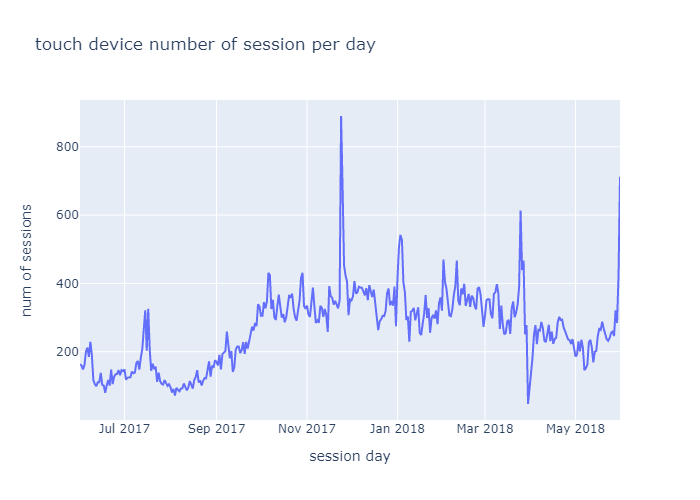

average desktop device number of sessions per day is: 721
average touch device number of sessions per day is: 266

------------------------------------------
desktop device average number of sessions per user is: 1
touch device average number of sessions per user is: 1


In [12]:

desktop_total = visits_desktop.groupby('session_day').agg({'Uid': 'count'}).reset_index()
touch_total = visits_touch.groupby('session_day').agg({'Uid': 'count'}).reset_index()
desktop_total.columns=['session day', 'num of sessions']
touch_total.columns=['session day', 'num of sessions']
fig = px.line(desktop_total, x="session day", y="num of sessions",title='desktop device number of session per day')
fig.show("png");
fig = px.line(touch_total, x="session day", y="num of sessions",title='touch device number of session per day')
fig.show("png");
print('average desktop device number of sessions per day is:' ,int(desktop_total['num of sessions'].mean()))
print('average touch device number of sessions per day is:' ,int(touch_total['num of sessions'].mean()))
print()
print('------------------------------------------')
print('desktop device average number of sessions per user is:',int(desktop_total['num of sessions'].mean()/desktop_dau))
print('touch device average number of sessions per user is:',int(touch_total['num of sessions'].mean()/touch_dau))

#### Session per day conclusion

We can see that on both devices the sessions per day differ quite similar , there is slight increase along the month with a light peak around the 24 day of november 2017, and big decrease in the end of the month, maybe because people try to decrease the expenses of the month or close credit paying day. 

We can see some correlation between the session per day and the dau that also usually decrease in the end of month.
between the devices we can see that there are alot more session per day on the desktop device.

### Length of each session 

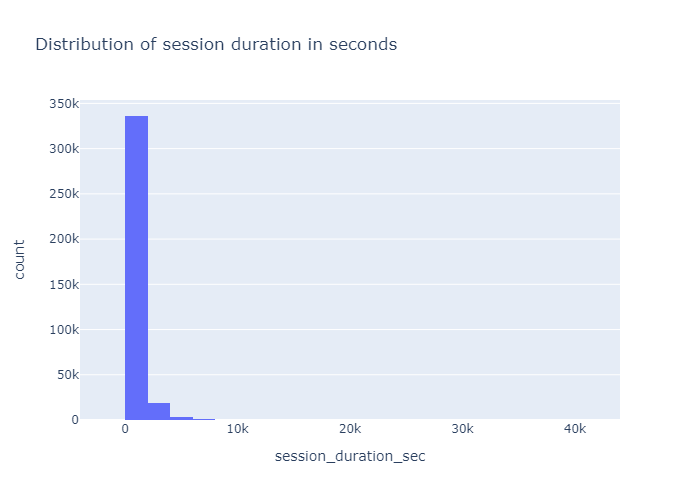

the common session length is : 60 seconds


In [13]:
visits['session_duration_sec'] = (
    visits['End Ts'] - visits['Start Ts']
).dt.total_seconds()
fig = px.histogram(visits, x="session_duration_sec", title='Distribution of session duration in seconds',nbins=30)
fig.show("png");

asl=visits['session_duration_sec'].mode()
print('the common session length is :', int(asl),'seconds')

I choose to show the common length of session because we can see that the sessions distribution is mostly close to zero and far from normal distribution, so common session reflect better the seesion length. 

In [14]:
pip install roi

Note: you may need to restart the kernel to use updated packages.


In [15]:
from roi import cohort_analysis

### Customers site visits retention by cohort

Creating Cohorts


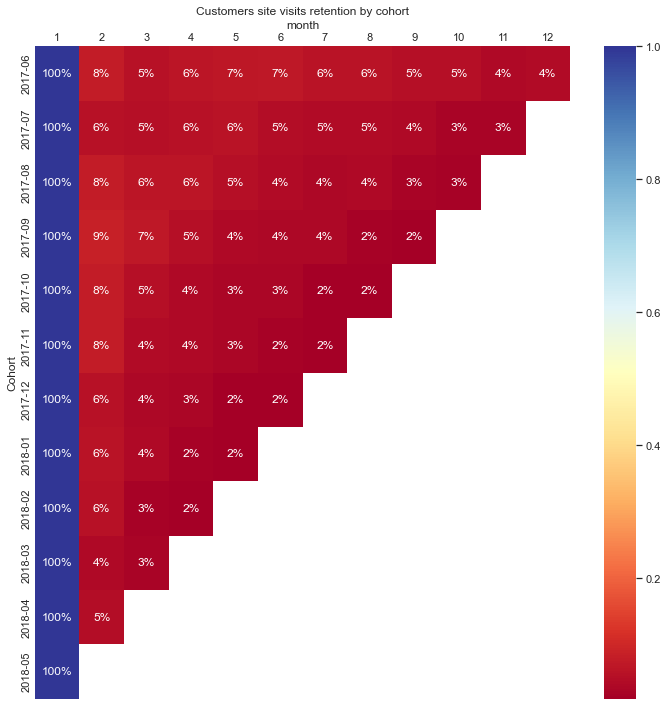

In [16]:
analysis=cohort_analysis(input_df=visits, ActivityDate='Start Ts', CustomerID='Uid')
analysis.plot_retention()
plt.title('Customers site visits retention by cohort')
plt.xlabel('month')
plt.show();

### Buyers retention by cohort 

Creating Cohorts


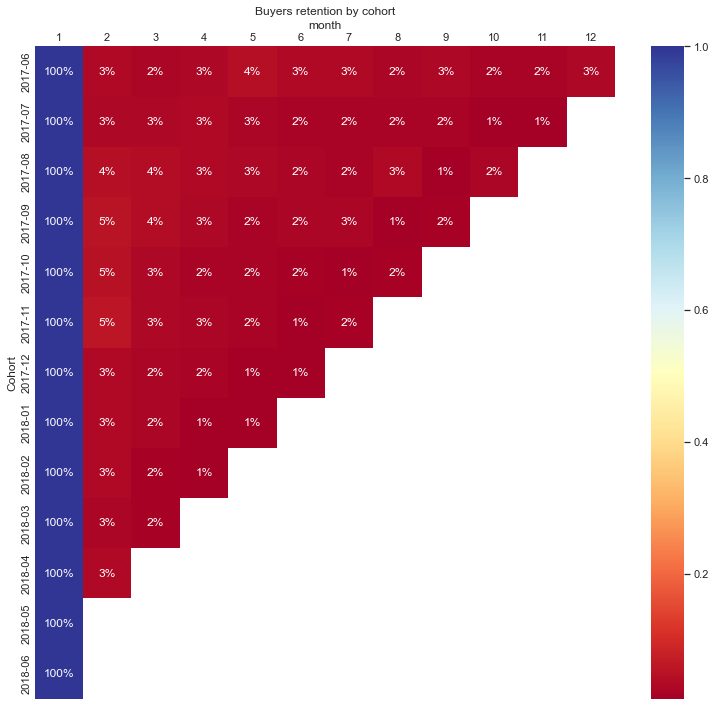

In [17]:
analysis=cohort_analysis(input_df=orders, ActivityDate='Buy Ts', CustomerID='Uid')
analysis.plot_retention()
plt.title('Buyers retention by cohort')
plt.xlabel('month')
plt.show();

#### Retetntion conclusion

From the vistors retetntion table we can see that the retetntion drop by month in all cohorts except the first one that increase on the 5 month, but its unique.

The strongest chort in the first month is the 09/2007 , and its staying strong in the following months but still decreasing. the are some other strong chorots in the first month but as i mentioned the first chorot of 06/2007 is unique because of its decreasing on the 5 month, it can be because the 5 month is on 11/2017 and maybe the black friday in the end of this month and the christmas shopping on december keeps its retntion high on this months. 

From the buyers retetntion table we can see that the 09/2007 is strong also with the buyers. we can see there are more movemnets up and down in the retntion along the month age in the differnt cohorts , and of course the retention rates are lower.

# Sales

### When do people start buying 

In [18]:
first_order=orders.groupby(['Uid'])['Buy Ts'].min().reset_index()
first_order.columns = ['Uid', 'first_order']
first_visit=visits.groupby(['Uid'])['Start Ts'].min().reset_index()
first_visit.columns = ['Uid', 'first_visit']
purchase=pd.merge(first_visit,first_order,on=['Uid'])
purchase['conversion']=((pd.to_datetime(purchase['first_order'])-pd.to_datetime(purchase['first_visit']))/np.timedelta64(1,'D'))


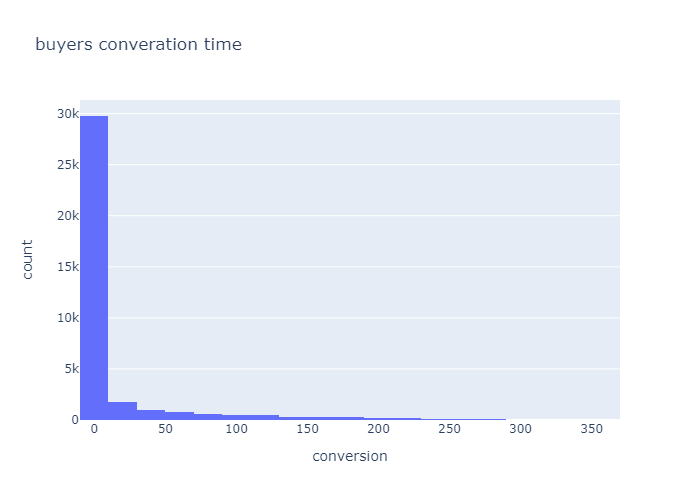

the median converation time is: 0.01


In [19]:
fig = px.histogram(purchase, x="conversion",nbins=30,title='buyers converation time')
fig.show("png");
print('the median converation time is:',round(purchase['conversion'].median(),2))

In [20]:
print(' The overall conversion is {:.1%}'.format(purchase['Uid'].nunique()/visits['Uid'].nunique()))

 The overall conversion is 16.0%


We can see that the users conversion is quite fast mostly in 0 days, and conversion rate is quite high with 16% of conversion.

In [21]:
first_order_date = orders.groupby('Uid')[
    'Buy Ts'
].min()
first_order_date.name = 'first_order_date'
orders = orders.join(first_order_date, on='Uid')
orders['first_order_month'] = orders['first_order_date'].astype(
    'datetime64[M]'
)
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')
orders['first_order_month']=orders['first_order_month'].dt.date
orders['order_month']=orders['order_month'].dt.date
orders['age_month']=(
    orders['order_month'] - orders['first_order_month']
) / np.timedelta64(1, 'M')
orders['age_month']= orders['age_month'].round().astype('int')


### How many orders do they make during a given period of time

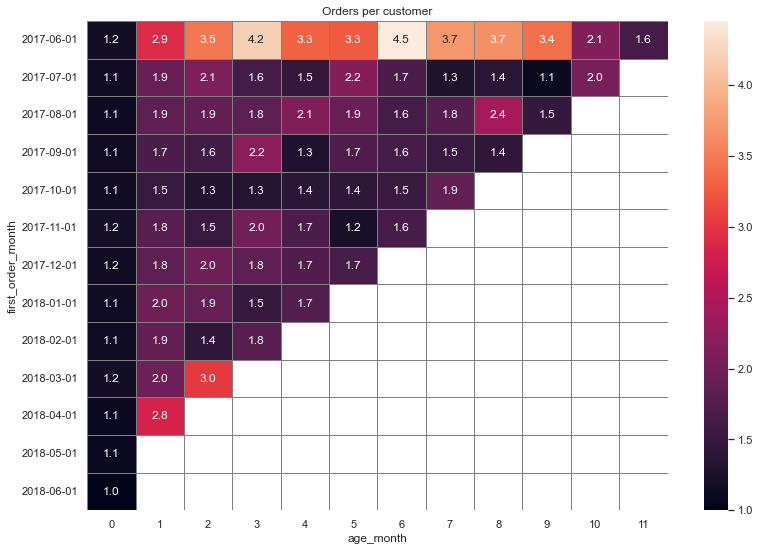

In [22]:
orders_count_by_cohorts = orders.groupby(
    ['first_order_month', 'age_month']
).agg({'Buy Ts': 'count', 'Uid': 'nunique'})
orders_count_by_cohorts['orders_per_buyer'] = (
    orders_count_by_cohorts['Buy Ts']
    / orders_count_by_cohorts['Uid']
) 
orders_pivot=orders_count_by_cohorts.pivot_table(
    index='first_order_month',
    columns='age_month',
    values='orders_per_buyer',
    aggfunc='sum',
)
orders_pivot.round(2).fillna('')
plt.figure(figsize=(13, 9))
plt.title('Orders per customer')
sns.heatmap(
    orders_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray'
) 
plt.show();


#### Orders over time conclusion 

We can see from the order per customer table that the first cohort of 06/2017 has high orders along time, with steady growing along the months.

Also the cohorts of 08/2007 and 09/2007 are quite strong.

### average purchase size per every user by different cohorts on different order month

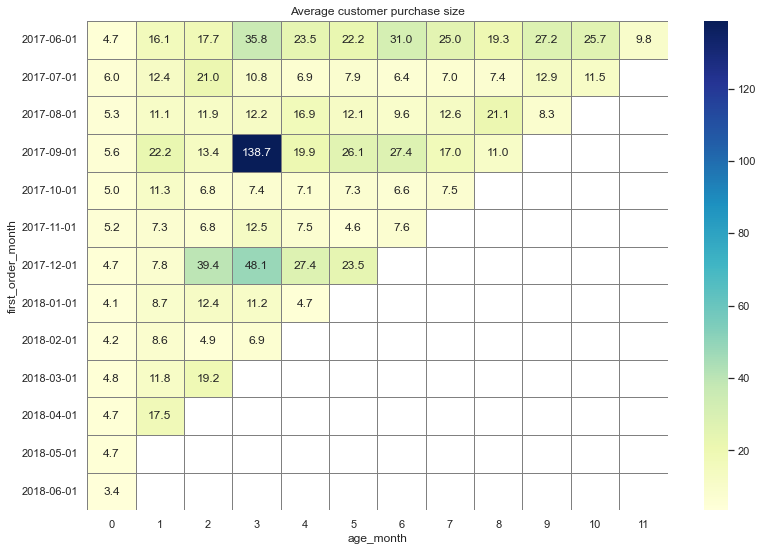

In [23]:
orders_revenue_by_cohorts = orders.groupby(
    ['first_order_month', 'age_month']
).agg({'Revenue': 'sum', 'Uid': 'nunique'})
orders_revenue_by_cohorts['revenue_per_user'] = (
    orders_revenue_by_cohorts['Revenue']
    / orders_revenue_by_cohorts['Uid']
) 
revenue_pivot=orders_revenue_by_cohorts.pivot_table(
    index='first_order_month',
    columns='age_month',
    values='revenue_per_user',
    aggfunc='mean',
) 
plt.figure(figsize=(13, 9))
plt.title('Average customer purchase size')
sns.heatmap(
    revenue_pivot,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
    cmap="YlGnBu"
) 
plt.show();

#### Purchase average size conclusion

From the table above we can see the 09/2007 cohort is strong in the avg purchase, there a uinque month with high increase in avg purchase size on the 3 month. it can be out of the christmas eve and all the present buying.

The 12/2017 cohort start slow but also have some strong months in the avg purchase size.

The first cohort of 06/2007  also have high amount of avg purchases, what make sense because we can see all along the way from the retention rates to amount of orders it strong cohort.

### Customers LTV by cohort

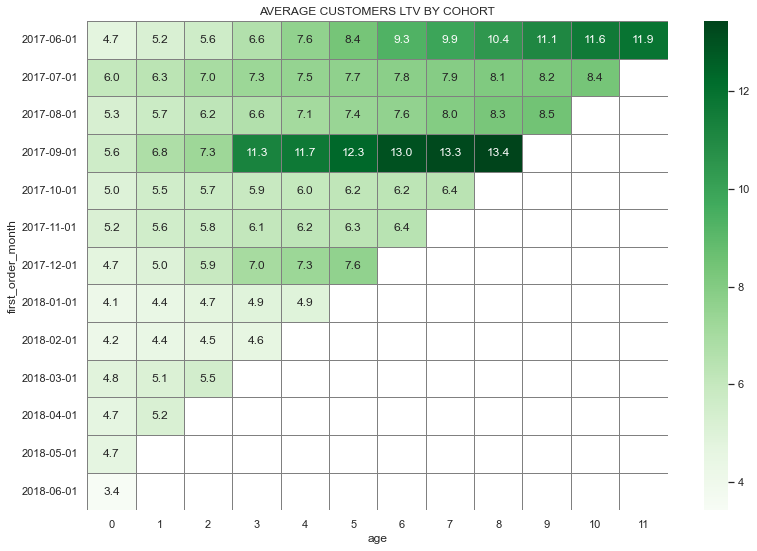

In [24]:
margin_rate = 1
cohort_sizes = orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
ltv_cohort=orders.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, ltv_cohort, on='first_order_month')
report['gp'] = report['Revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).cumsum(axis=1)
output.round(2).fillna('')
plt.figure(figsize=(13, 9))
plt.title('AVERAGE CUSTOMERS LTV BY COHORT')
sns.heatmap(
    output,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray',
    cmap="Greens"
) 
plt.show();

#### LTV conclusion 

From the table above of the ltv values we can clearly that there are two profitable cohorts that stand above the others. the first one of 06/2017 and mostly the cohort of 09/2017. this findings make sense and backed up in previous data about this cohorts.

There can be some reasons for this chorts be proftiable, it can be out of pure luck that are some whales users who got into this chorot. or it can be out of seasonly reasons, and for the first cohort of 06/2017 it can be from the long data on it. there could be also strong cohorts in 2018 but we lack data about them.

# Marketing 

### How much money was spent? Overall/per source/over time 

In [25]:
print('the overall cost of Marketing is:',costs.costs.sum())
print('---------------------------------------')
print('the overall cost of Marketing per source')
source_costs=costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
source_costs.columns = ['source_id', 'overall cost']
source_costs


the overall cost of Marketing is: 329131.62
---------------------------------------
the overall cost of Marketing per source


,source_id,overall cost
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


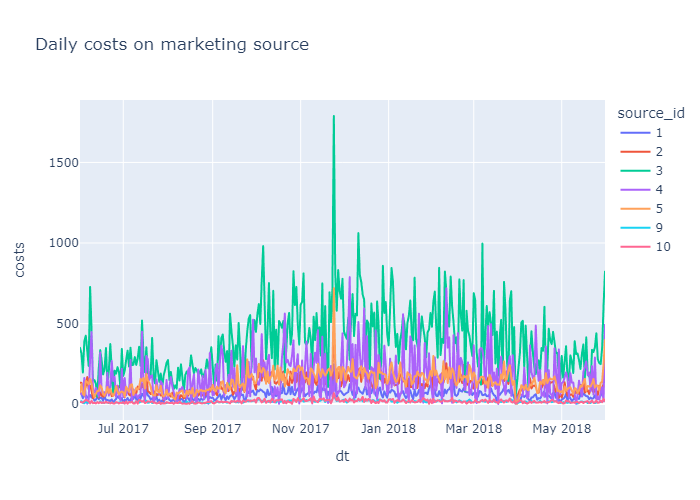

In [26]:
fig = px.line(costs, x="dt", y="costs", color='source_id',title='Daily costs on marketing source ')
fig.show("png");

In [27]:
print('the overall cost of Marketing per month')
costs['month']=costs['dt'].astype('datetime64[M]')
costs['month']=costs['month'].dt.date
time_costs=costs.groupby('month').agg({'costs': 'sum'}).reset_index()
time_costs.columns = ['month', 'overall cost']
time_costs

the overall cost of Marketing per month


,month,overall cost
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


#### Marketing expanses conclusion

We can see that on the 3 and 4 markting sources there are the most big investments, and on the 10 marketing source we speand the least amount.

The markting expenses spread along the months but we can see that from 10/2017 to 03/2018 the expenses are higher, probably out of seasonly reasons, try to get the most from that time.

We can see intersting correlation between this period of time from 10/2017 to 03/2018 between the high exapnses on marketing and the dau values that all of them are above the average in this period of time. what probably has infulence on the average purchase size that in most of the cohorts is higher on this time period.

### Customer acquisition cost from each one of the sources 

In [28]:
source=pd.merge(orders,visits,on='Uid')
first_source=source.sort_values('Buy Ts').groupby('Uid').first()['Source Id'].reset_index()
first_source.columns=['Uid','first_source']
orders=orders.merge(first_source,on=['Uid'],how='left')

In [29]:
o_costs=orders.groupby(['first_source','first_order_month']).agg({'Uid': 'nunique'}).reset_index()
o_costs.columns=['source_id','month','buyers']
source_markting=costs.groupby(['month','source_id'])['costs'].sum().reset_index()
source_markting=source_markting.merge(o_costs,how='left',on=['source_id','month'])
source_markting['cac source']=source_markting['costs']/source_markting['buyers']
source_markting.head()

,month,source_id,costs,buyers,cac source
0,2017-06-01,1,1125.61,215,5.235395
1,2017-06-01,2,2427.38,279,8.700287
2,2017-06-01,3,7731.65,574,13.469774
3,2017-06-01,4,3514.80,410,8.572683
4,2017-06-01,5,2616.12,363,7.206942


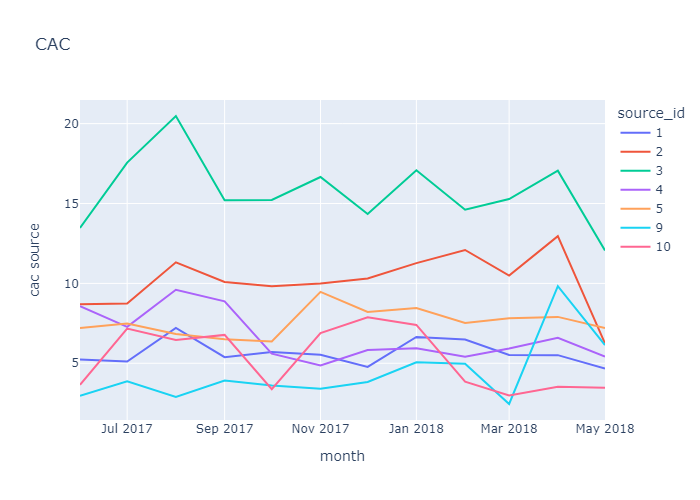

In [30]:
fig = px.line(source_markting, x="month", y="cac source",color='source_id',title='CAC')
fig.show("png");

### Customer acquisition cost by month

In [31]:
cac_orders=orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cac_orders.columns=['month','uid']
time_costs['month']=pd.to_datetime(time_costs['month'])
cac_orders['month']=pd.to_datetime(cac_orders['month'])
cac_month=pd.merge(time_costs,cac_orders,on='month')
cac_month['cac month']=cac_month['overall cost']/cac_month['uid']
cac_month


,month,overall cost,uid,cac month
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1923,9.485486
2,2017-08-01,14790.54,1370,10.796015
3,2017-09-01,24368.91,2581,9.441654
4,2017-10-01,36322.88,4340,8.369327
5,2017-11-01,37907.88,4081,9.288870
6,2017-12-01,38315.35,4383,8.741809
7,2018-01-01,33518.52,3373,9.937302
8,2018-02-01,32723.03,3651,8.962758
9,2018-03-01,30415.27,3533,8.608907


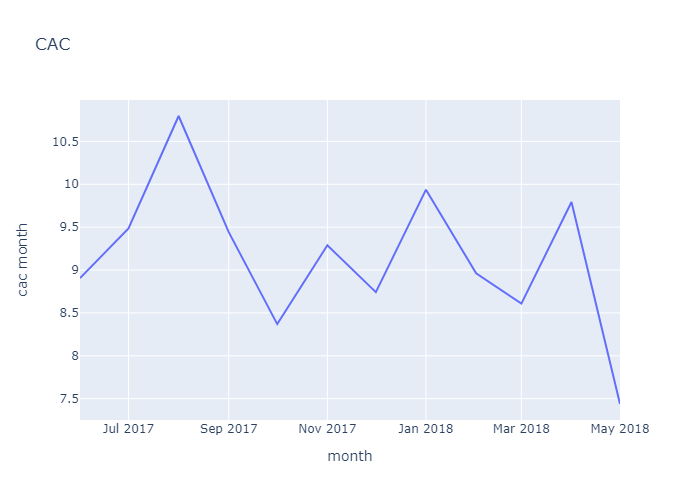

In [32]:
fig = px.line(cac_month, x='month', y='cac month',title='CAC')
fig.show("png");


#### CAC conclusion

We can see that the customer acquisition cost on the 3 markting source is by far the highest, quite far from any other source. on this source there an increase in the CAC on 08/2017 maybe out of seasonly reasons ,maybe summer time shopping. we can see this increase has strong affect on the CAC by month , as can be seen in the peak on the graph in this month.

We can see that the 1 and 9 markting source has the lowest CAC.

## How worthwhile where the investments

### ROI per cohort 

In [33]:
CAC_per_month_ROI=cac_month[['month','cac month']]
CAC_per_month_ROI.columns=['first_order_month','cac month']
report['first_order_month']=pd.to_datetime(report['first_order_month'])
ROI=report.merge(CAC_per_month_ROI,on=['first_order_month'],how='left')


In [34]:
ROI['ROI']=ROI['ltv']/ROI['cac month']
roi_piv = ROI.pivot_table(
    index='first_order_month', columns='age', values='ROI', aggfunc='mean'
).cumsum(axis=1).round(2) 

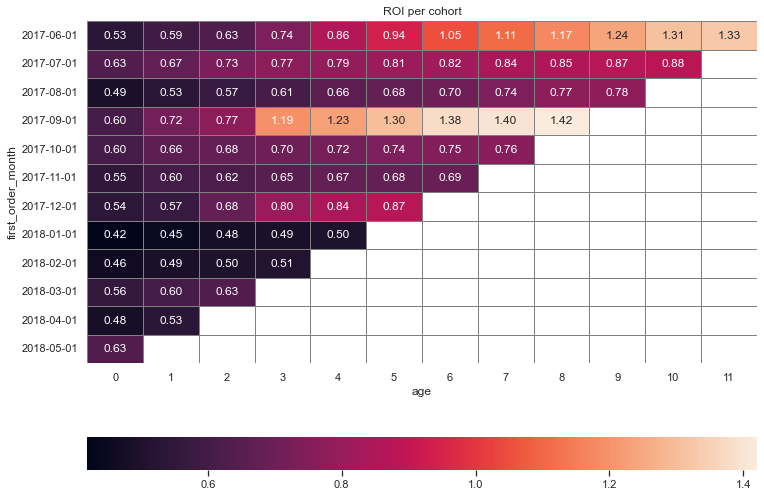

In [35]:
roi_piv.index=roi_piv.index.astype(str)
plt.figure(figsize=(12, 9))
sns.heatmap(roi_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='ROI per cohort')
plt.show();

#### ROI conclusion

We can see in the roi per cohort table that there are two strong cohorts who are worth to invest in. the cohort of 06/2017 that in the first two month have a slow start but then he get stronger, and the most profit one, the cohort of 09/2017. 

For the cohort of 05/2018 we lack data but he had potential because he start quite strong on the first month. 

### ROMI per marketing source 

In [36]:
ltv_per_source=orders.groupby(['first_source'])['Uid','Revenue'].agg({'Uid':'nunique','Revenue':'sum'}).reset_index()
ltv_per_source.columns=['source_id','buyers','revenue']
ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['buyers']
ltv_per_source


,source_id,buyers,revenue,ltv
0,1,3742,38521.73,10.294423
1,2,4272,66703.29,15.614066
2,3,9175,43195.48,4.707954
3,4,9878,53183.10,5.383995
4,5,6804,39010.68,5.733492
5,7,1,1.22,1.220000
6,9,1420,7322.30,5.156549
7,10,1231,4119.40,3.346385


In [37]:
roi_per_source=source_costs.merge(ltv_per_source,on=['source_id'])
roi_per_source['cac']=roi_per_source['overall cost']/roi_per_source['buyers']
roi_per_source['romi']=roi_per_source['ltv']/roi_per_source['cac']
roi_per_source

,source_id,overall cost,buyers,revenue,ltv,cac,romi
0,1,20833.27,3742,38521.73,10.294423,5.567416,1.849049
1,2,42806.04,4272,66703.29,15.614066,10.020140,1.558268
2,3,141321.63,9175,43195.48,4.707954,15.402902,0.305654
3,4,61073.60,9878,53183.10,5.383995,6.182790,0.870803
4,5,51757.10,6804,39010.68,5.733492,7.606864,0.753726
5,9,5517.49,1420,7322.30,5.156549,3.885556,1.327107
6,10,5822.49,1231,4119.40,3.346385,4.729886,0.707498


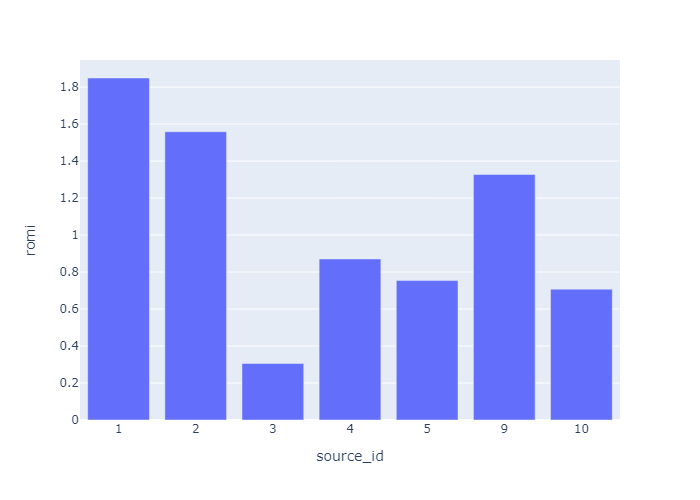

In [38]:
fig = px.bar(roi_per_source, x='source_id', y='romi')
fig.update_xaxes(type='category')
fig.show("png");

#### ROMI conclusion 
We can see that source id 3 gets the lowest romi, this marketing source  has by the far the biggest cac and investment in it, but is not bringing the profit.
it seems the investment in it not worthwhile. 
While the 1 and 2 marketing sources has the most high romi values,high ltv values, and seems the good place to increase the investment in them.  

# General conclusion

To marketing department,

This report comes to investigate: How users use the product, When they start to buy, How much money each customer brings,When they pay off.

In order to advise to you, how much money to invest and in wich marketing sources to invest in.

After analyzing the data, i came across some finding and conclusions i will show here.

First of all from investigating the DAU and the session per day on the different devices the users come from, we can see that the desktop device have higher DAU and higher session per day then the touch device.

From the DAU,WAU and MAU values we can see that the most active period of time on the sites is between 10/2017 to 03/2018.

There is good news regarding the converation of our users .they convert to buyers quickly mostly on there first day of visit with 16% of converation rate out of our users.

The retntion rate of our users is 6.72% in average after 1 month and 3.83% after 6 momth.
the retntion rate of our buyers is 3.63% in average after 1 month and 2.16% after 6 month. it seems that in the purchases there is more steady retntion.

By deviding our buyers to different chorots, for deeper analysis, we can see from the values of order amount, average purchase size and ltv per user, that the cohorts of 06/2017 and mostly the 09/2017 are the most profitable ones.
now we move on to the important subject of the marketing expanses. 

We can see that on the 3 and 4 markting sources there are the most big investments, and on the 10 marketing source we speand the least amount.

The marketing expenses spread along the months but we can see that from 10/2017 to 03/2018 the expenses are higher, probably out of seasonly reasons, try to get the most from that time.

We can see intersting correlation between this period of time from 10/2017 to 03/2018 between the high exapnses on marketing and the dau values that all of them are above the average in this period of time. what probably has infulence on the average purchase size that in most of the cohorts is higher on this time period.

We can see that the customer acquisition cost on the 3 marketing source is by far the highest, quite far from any other source. on this source there an increase in the CAC on 08/2017 maybe out of seasonly reasons ,maybe summer time shopping. we can see this increase has strong affect on the CAC by month , as can be seen in the peak on the graph in this month.

We can see that the 1 and 9 marketing source has the lowest CAC.

When we check the ROI of the different cohorts we can see that the 06/2017 and 09/2017 cohorts as the best return of our investmet what make sense out of the period data on this cohorts.

When we look on our marketing sources we can see that the ROMI of 1 and 2 source is the highest, also the 9 source is high. the 3 source is the lowest one, and we can see clearly that the amount of money that we speand on this marketing source was not worthwhile.

For conculsion my recommendations to you, is to invest the marketing budget mostly on the 1 and 2 marketing sources, focus on the buyers from the 06/2017 cohort and mostly on the 09/2017 cohort.